In [76]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np



In [137]:
msft = yf.Ticker("MSFT")
data = msft.history(period="7d",interval='1m',start=dt.datetime(2022,12,1), end=dt.datetime(2022,12,6))

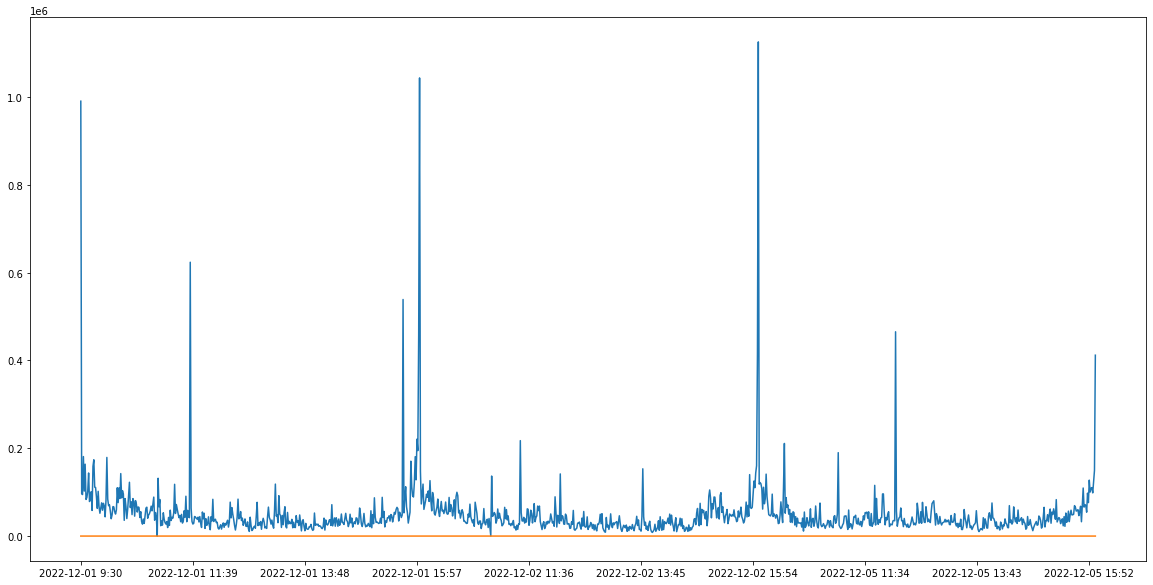

In [127]:
plt.figure(figsize=(20,10))
plt.plot(hist['Volume'].values)
plt.plot(hist['Open'].values)
inedxes = np.arange(0,len(hist), len(hist) // 9)
plt.xticks(inedxes, [str(hist.index[i].date())+ " "+str(hist.index[i].hour)+":"+str("%02d" % hist.index[i].minute) for i in inedxes])
plt.show()

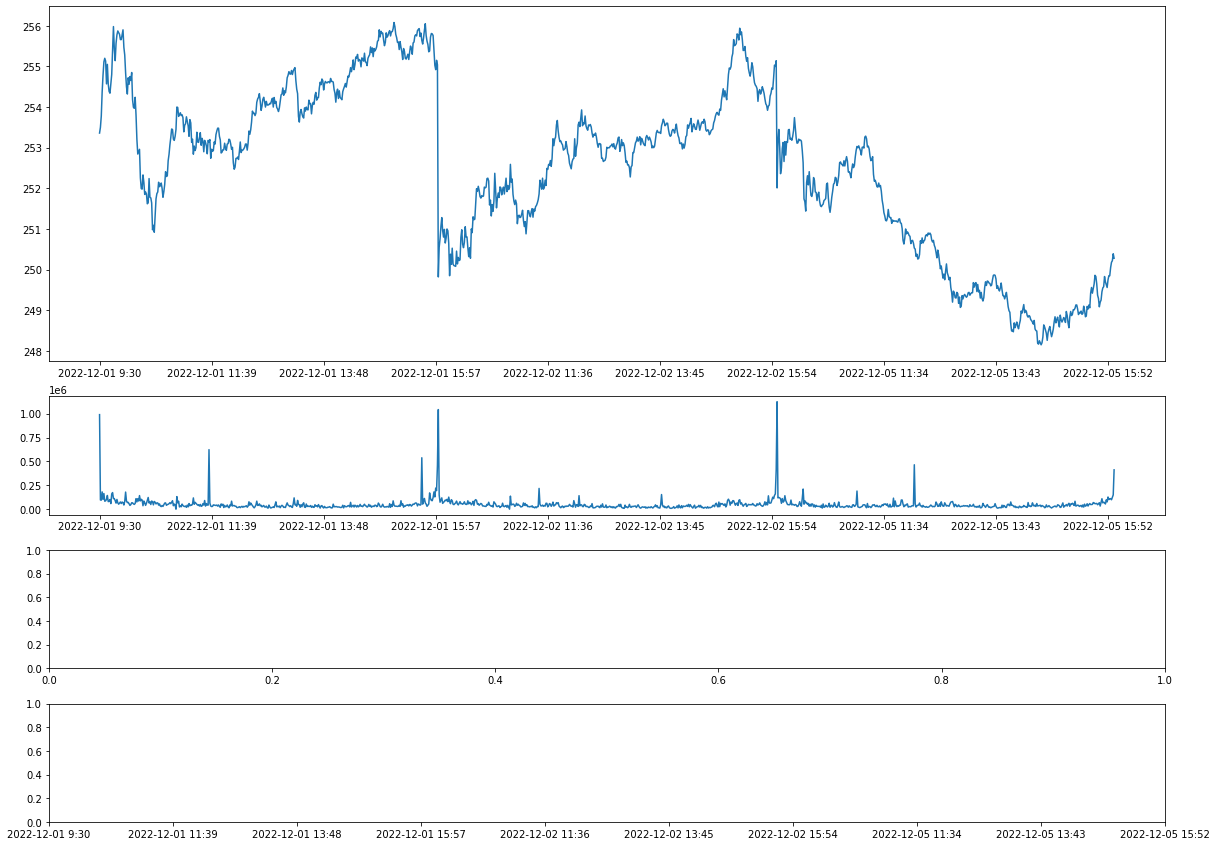

In [141]:
fig, ax = plt.subplots(4, 1, gridspec_kw={"height_ratios": [3, 1, 1, 1]}, figsize=(20,15))

inedxes = np.arange(0,len(data), len(data) // 9)
plt.xticks(inedxes, [str(data.index[i].date())+ " "+str(data.index[i].hour)+":"+str("%02d" % data.index[i].minute) for i in inedxes])

ax[0].plot(data['Open'].values)
plt.sca(ax[0])
plt.xticks(inedxes, [str(data.index[i].date())+ " "+str(data.index[i].hour)+":"+str("%02d" % data.index[i].minute) for i in inedxes])

ax[1].plot(data['Volume'].values)
plt.sca(ax[1])
plt.xticks(inedxes, [str(data.index[i].date())+ " "+str(data.index[i].hour)+":"+str("%02d" % data.index[i].minute) for i in inedxes])
plt.show()

In [157]:
data['macd_hist'].index

DatetimeIndex(['2022-12-01 09:30:00-05:00', '2022-12-01 09:31:00-05:00',
               '2022-12-01 09:32:00-05:00', '2022-12-01 09:33:00-05:00',
               '2022-12-01 09:34:00-05:00', '2022-12-01 09:35:00-05:00',
               '2022-12-01 09:36:00-05:00', '2022-12-01 09:37:00-05:00',
               '2022-12-01 09:38:00-05:00', '2022-12-01 09:39:00-05:00',
               ...
               '2022-12-05 15:50:00-05:00', '2022-12-05 15:51:00-05:00',
               '2022-12-05 15:52:00-05:00', '2022-12-05 15:53:00-05:00',
               '2022-12-05 15:54:00-05:00', '2022-12-05 15:55:00-05:00',
               '2022-12-05 15:56:00-05:00', '2022-12-05 15:57:00-05:00',
               '2022-12-05 15:58:00-05:00', '2022-12-05 15:59:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=1169, freq=None)

In [165]:
[i for i, x in enumerate(data.index == data.index[10]) if x][0]

10

([<matplotlib.axis.XTick at 0x15a773d03a0>,
 [Text(0, 0, '2022-12-01 9:30'),
  Text(129, 0, '2022-12-01 11:39'),
  Text(258, 0, '2022-12-01 13:48'),
  Text(387, 0, '2022-12-01 15:57'),
  Text(516, 0, '2022-12-02 11:36'),
  Text(645, 0, '2022-12-02 13:45'),
  Text(774, 0, '2022-12-02 15:54'),
  Text(903, 0, '2022-12-05 11:34'),
  Text(1032, 0, '2022-12-05 13:43'),
  Text(1161, 0, '2022-12-05 15:52')])

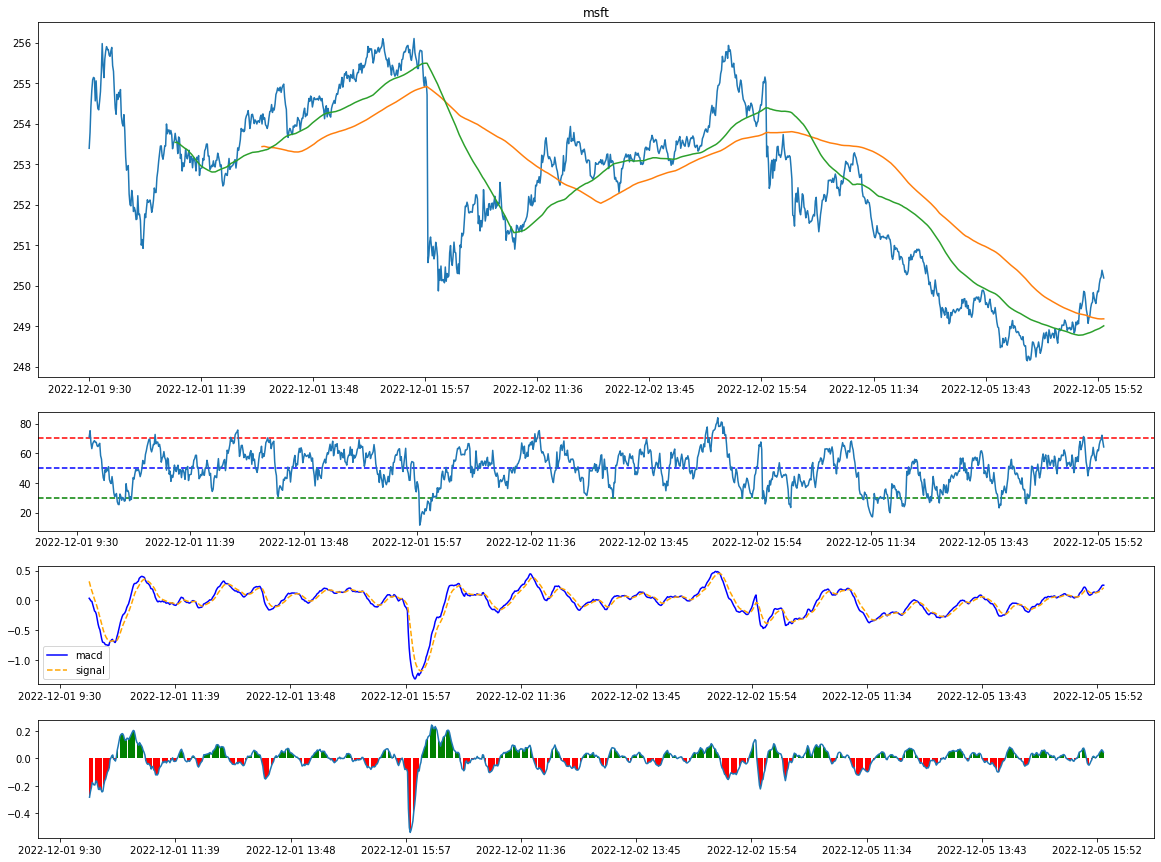

In [160]:
import talib as ta

ticker_code = "msft"
trades = []

inedxes = np.arange(0,len(data), len(data) // 9)

data['RSI'] = ta.RSI(data['Close'])
data['macd'], data['macd_signal'], data['macd_hist'] = ta.MACD(data['Close'])
data['SMA200'], data['SMA100'] = ta.SMA(data['Close'], 200), ta.SMA(data['Close'], 100)
fig, ax = plt.subplots(4, 1, gridspec_kw={"height_ratios": [3, 1, 1, 1]}, figsize=(20,15))

ax[0].plot(data['Close'].values)
ax[0].plot(data['SMA200'].values)
ax[0].plot(data['SMA100'].values)
ax[0].set_title(ticker_code)

plt.sca(ax[0])
plt.xticks(inedxes, [str(data.index[i].date())+ " "+str(data.index[i].hour)+":"+str("%02d" % data.index[i].minute) for i in inedxes])

if trades != []:
    for t in trades:
        ax[0].axvline(t.date, c="r" if t.kind == "sell" else "g")
        ax[3].axvline(t.date, c="r" if t.kind == "sell" else "g")
        
ax[1].axhline(y=70, color='r', linestyle='--')
ax[1].axhline(y=50, color='b', linestyle='--')
ax[1].axhline(y=30, color='g', linestyle='--')
ax[1].plot(data['RSI'].values)
plt.sca(ax[1])
plt.xticks(inedxes, [str(data.index[i].date())+ " "+str(data.index[i].hour)+":"+str("%02d" % data.index[i].minute) for i in inedxes])


c = ['red' if cl < 0 else 'green' for cl in data['macd_hist']]
ax[2].plot(data['macd'].values, 'b-')
ax[2].plot(data['macd_signal'].values, '--', color='orange')
ax[2].legend(['macd', 'signal'])
plt.sca(ax[2])
plt.xticks(inedxes, [str(data.index[i].date())+ " "+str(data.index[i].hour)+":"+str("%02d" % data.index[i].minute) for i in inedxes])

ax[3].bar(np.arange(len(data)),data['macd_hist'].values, color=c)
ax[3].plot(data['macd_hist'].values)
plt.sca(ax[3])
plt.xticks(inedxes, [str(data.index[i].date())+ " "+str(data.index[i].hour)+":"+str("%02d" % data.index[i].minute) for i in inedxes])